# **CUSTOMER REVIEW ANALYSIS OF USA AIRLINE INDUSTRY**

In [0]:
"""
CREATED ON MONDAY JUNE 26, 2019 

@ AUTHOR NAVEEN BALARAJU
"""

'\nCREATED ON MONDAY JUNE 26, 2019 \n\n\n@ AUTHOR NAVEEN BALARAJU\n'

Airline is a highly sophisticated and a competitive industry and customer satisfaction is the focal point that impacts the performance of the company over it competitors.According to Estelami,customer reviews provides a company with an opportunity to rectify the mistakes,reatin dissatisfied consumers, and retain influence consumers future attitude and behavior.

According to Forbes, there are 4 factors that considered while ranking the Airlnes
1. on-time performance 
2. Customer Reviews
3. Denied Boarding 
4. Mishandeled Baggage

In this study, the main focus is on the analysis of the "customer sentiments" towards the service provided America's airline carriers like
1.  Alaska Airlines
2.  Delta  Airlines
3. JetBlue Airlines
4. Southwest Airlines
5. Hawaiian Airlines
6. American Airlines
7. United Airlines

The data for the analysis has been scraped using twitter API and the tweets with the following hash tags were used for data collection within the time period
    June 15,2019 to July 12, 2019
1. #Delta OR #DeltaAirlines OR #DeltaAirways 
2. #JetBlue 
3. #Southwest OR  #SouthwestAirlines OR #SouthWestAir
4. #alaskaairlines  OR #iFlyAlaska OR #AlaskaAir
5. #HawaiianAirlines OR #HawaiianAirways
6. #UnitedAirlines
7. #AmericanAirlines  OR #AmericanAir

In [0]:
import os
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud 
import emoji
from nltk.stem import PorterStemmer 
from nltk.tokenize.moses import MosesDetokenizer

**ANALYSIS OF ALASKA AIRLINES CUSTOMER REVIEWS**

In [0]:
Alaska_AL = pd.read_csv('ALaska_june15_july12.csv')
Alaska_AL.info()
#Alaska_AL = pd.concat([Al_1,Al_2,Al_3],ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 4 columns):
Text                1109 non-null object
Tweet created at    1109 non-null object
User Location       908 non-null object
User name           1109 non-null object
dtypes: object(4)
memory usage: 34.7+ KB


In [0]:
Alaska_AL.head()

,Text,Tweet created at,User Location,User name
0,@AlaskaAir I'm flying Alaska today! #iflyalask...,2019-06-25 18:55:44,PNW,Simon_Says_Rain
1,"Big week at Paine Field, ⁦@BeechersSeattle⁩ an...",2019-06-25 18:42:31,"Everett, WA",Fly Paine Field
2,@AlaskaAir #iFlyAlaska I can't wait to fly @Al...,2019-06-25 18:05:30,"Maple Valley, WA",Kori
3,Bend is my number one choice! #inbend #iflyala...,2019-06-25 18:03:02,"Seattle, WA",Bryan Zidar
4,Let’s gif this party started! Share your trave...,2019-06-25 18:00:51,"Seattle, WA",Alaska Airlines


**Text preprocessing**

In [0]:
def deEmojify(inputString):
    return emoji.demojize(inputString)

In [0]:
Alaska_AL['Text'] = Alaska_AL['Text'] .apply(deEmojify)

In [0]:
Alaska_AL['Text'] = Alaska_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")

In [0]:
Alaska_AL['Text'] = Alaska_AL['Text'].str.replace("[^a-zA-Z#]", " ")

In [0]:
Alaska_AL['Text'] = Alaska_AL['Text'].str.lower()

In [0]:
stop_words = stopwords.words('english')
alaska_stopwords = ['alaskaair','iflyalaska','alaska','airlines','alaskaairlines','https']
stop_words.extend(alaska_stopwords)

In [0]:
def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words]

In [0]:
Alaska_AL['Processed_text'] = Alaska_AL['Text'].apply(text_process)

In [0]:
def detoken(tokens):
  detokenizer = MosesDetokenizer()
  dt = detokenizer.detokenize(tokens,return_str = True)
  
  return dt

In [0]:
Alaska_AL['Processed_text'] = Alaska_AL['Processed_text'].apply(detoken)

In [0]:
text = Alaska_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

In [0]:
Alaska_AL['Sentiment'] = polarity
Alaska_AL['Subjectivity'] = subjectivity

In [0]:
Alaska_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,alaskaair i m flying alaska today iflyalask...,2019-06-25 18:55:44,PNW,Simon_Says_Rain,flying today co oh x dt,0.0,0.0
1,big week at paine field beechersseattle an...,2019-06-25 18:42:31,"Everett, WA",Fly Paine Field,big week paine field beechersseattle caffevita...,0.0,0.3
2,alaskaair iflyalaska i can t wait to fly al...,2019-06-25 18:05:30,"Maple Valley, WA",Kori,wait fly airline monogamous pas co jislt,0.8,0.9
3,bend is my number one choice inbend iflyala...,2019-06-25 18:03:02,"Seattle, WA",Bryan Zidar,bend number one choice inbend co wbjc nviif,0.0,0.0
4,let s gif this party started share your trave...,2019-06-25 18:00:51,"Seattle, WA",Alaska Airlines,let gif party started share travel adventures ...,0.0,0.0


In [0]:
def apply_threshold(sentiment):
    if sentiment < 0:
        sentiment = 'Negative'
    elif sentiment == 0:
        sentiment = 'Neutral'
    else:
        sentiment = 'Positive'
        
    return sentiment

In [0]:
Alaska_AL['Sentiment'] = Alaska_AL['Sentiment'].apply(apply_threshold)

In [0]:
Alaska_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,alaskaair i m flying alaska today iflyalask...,2019-06-25 18:55:44,PNW,Simon_Says_Rain,flying today co oh x dt,Neutral,0.0
1,big week at paine field beechersseattle an...,2019-06-25 18:42:31,"Everett, WA",Fly Paine Field,big week paine field beechersseattle caffevita...,Neutral,0.3
2,alaskaair iflyalaska i can t wait to fly al...,2019-06-25 18:05:30,"Maple Valley, WA",Kori,wait fly airline monogamous pas co jislt,Positive,0.9
3,bend is my number one choice inbend iflyala...,2019-06-25 18:03:02,"Seattle, WA",Bryan Zidar,bend number one choice inbend co wbjc nviif,Neutral,0.0
4,let s gif this party started share your trave...,2019-06-25 18:00:51,"Seattle, WA",Alaska Airlines,let gif party started share travel adventures ...,Neutral,0.0


**Negative comments**

In [0]:
Alaska_AL[Alaska_AL['Sentiment']=='Negative'].head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
13,alaska plane crash victims id ed https t ...,2019-06-25 09:02:08,Worldwide,AirlineNews,plane crash victims id ed co e u apxsxm curiou...,Negative,1.000000
30,alaskaairlines most weird airlines in my life...,2019-06-24 16:53:29,NaN,Bella,weird life broke second time two luggage wheel...,Negative,0.484848
49,flying from ny to la last night the flight wa...,2019-06-23 20:07:15,"Pasadena, CA",Rick Abe,flying ny la last night flight delayed complet...,Negative,0.347222
51,alaskaair worst customer service ever they h...,2019-06-23 19:14:00,"Everywhere, Global",StBread,worst customer service ever one job seat famil...,Negative,1.000000
61,and for an unknown reason there was no way to ...,2019-06-23 11:07:35,Seattle,Sprizee,unknown reason way check flight online alterna...,Negative,0.600000


**Neutral comments**

In [0]:
Alaska_AL[Alaska_AL['Sentiment']=='Neutral'].head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,alaskaair i m flying alaska today iflyalask...,2019-06-25 18:55:44,PNW,Simon_Says_Rain,flying today co oh x dt,Neutral,0.0
1,big week at paine field beechersseattle an...,2019-06-25 18:42:31,"Everett, WA",Fly Paine Field,big week paine field beechersseattle caffevita...,Neutral,0.3
3,bend is my number one choice inbend iflyala...,2019-06-25 18:03:02,"Seattle, WA",Bryan Zidar,bend number one choice inbend co wbjc nviif,Neutral,0.0
4,let s gif this party started share your trave...,2019-06-25 18:00:51,"Seattle, WA",Alaska Airlines,let gif party started share travel adventures ...,Neutral,0.0
5,altrumpf we truly appreciate you thank you f...,2019-06-25 16:53:27,"Seattle, WA",Alaska Airlines,altrumpf truly appreciate thank loyalty suli,Neutral,0.0


**Positive comments**

In [0]:
Alaska_AL[Alaska_AL['Sentiment']=='Positive'].head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
2,alaskaair iflyalaska i can t wait to fly al...,2019-06-25 18:05:30,"Maple Valley, WA",Kori,wait fly airline monogamous pas co jislt,Positive,0.900000
6,my favorite pdx team and my favorite airline ...,2019-06-25 16:25:33,"Venersborg, WA",Linda Dollar,favorite pdx team favorite airline see thursda...,Positive,1.000000
7,iconic change of perspective alaskaairlines ...,2019-06-25 15:58:18,Montana,Lise McClendon,iconic change perspective horizonair mountrain...,Positive,0.500000
9,kellyjohorton lol great shot all business ...,2019-06-25 13:51:56,"Seattle, WA",Alaska Airlines,kellyjohorton lol great shot business beautifu...,Positive,0.816667
14,good morning alaskaair let s start this day ...,2019-06-25 07:32:21,NaN,Kevin,good morning let start day amazing,Positive,0.750000


In [0]:
Neutral_AL = len(Alaska_AL['Sentiment'][Alaska_AL['Sentiment']=='Neutral'])
Positive_AL = len(Alaska_AL['Sentiment'][Alaska_AL['Sentiment']=='Positive'])
Negative_AL = len(Alaska_AL['Sentiment'][Alaska_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_AL)
print("Number of Positive sentiments:",Positive_AL)
print("Number of Negative sentiments:",Negative_AL)

Number of Neutral sentiments: 385
Number of Positive sentiments: 626
Number of Negative sentiments: 98


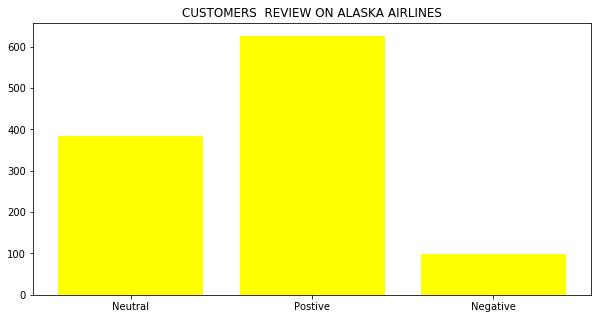

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_AL,Positive_AL,Negative_AL]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'yellow')
plt.title('CUSTOMERS  REVIEW ON ALASKA AIRLINES')
plt.show()

**ANALYSIS OF AMERICAN AIRLINES CUSTOMER REVIEWS**

In [0]:
American_Al = pd.read_csv('American_june15_july12.csv')
American_Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 4 columns):
Text                2587 non-null object
Tweet created at    2587 non-null object
User Location       1726 non-null object
User name           2587 non-null object
dtypes: object(4)
memory usage: 80.9+ KB


In [0]:
American_Al['Text'] = American_Al['Text'] .apply(deEmojify)
American_Al['Text'] = American_Al['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
American_Al['Text'] = American_Al['Text'].str.replace("[^a-zA-Z#]", " ")
American_Al['Text'] = American_Al['Text'].str.lower()
American_Al.head()

,Text,Tweet created at,User Location,User name
0,thankful for family in particular my mccarthy...,2019-07-12 08:52:15,Michigan,peggy horan
1,americanair hey americanairlines just curiou...,2019-07-12 08:17:29,NaN,John Kennett
2,haha what a joke americanair first you boot ...,2019-07-12 07:43:46,"Los Angeles, CA",DJ Hamburger
3,how to travel smoothly with americanairlines ...,2019-07-12 07:38:29,United States,Americanairlinesreservations
4,there are no words to describe how absolutely ...,2019-07-12 07:28:13,"Washington, DC",Mischief Managed


In [0]:
stop_words = stopwords.words('english')
my_stopwords = ['americanair','https','americanairlines','americanairlines']
stop_words.extend(my_stopwords)

In [0]:
def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words]

In [0]:
American_Al['Processed_text'] = American_Al['Text'].apply(text_process)
American_Al['Processed_text'] = American_Al['Processed_text'].apply(detoken)

In [0]:
American_Al.head()

,Text,Tweet created at,User Location,User name,Processed_text
0,thankful for family in particular my mccarthy...,2019-07-12 08:52:15,Michigan,peggy horan,thankful family particular mccarthy side thank...
1,americanair hey americanairlines just curiou...,2019-07-12 08:17:29,NaN,John Kennett,hey curious kim dustin concourse check phl co ...
2,haha what a joke americanair first you boot ...,2019-07-12 07:43:46,"Los Angeles, CA",DJ Hamburger,haha joke first boot sister mother dallas conn...
3,how to travel smoothly with americanairlines ...,2019-07-12 07:38:29,United States,Americanairlinesreservations,travel smoothly carried easy way owing co ko jkcj
4,there are no words to describe how absolutely ...,2019-07-12 07:28:13,"Washington, DC",Mischief Managed,words describe absolutely incompetent challeng...


In [0]:
text = American_Al['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

In [0]:
American_Al['Sentiment'] = polarity
American_Al['Subjectivity'] = subjectivity
American_Al['Sentiment'] = American_Al['Sentiment'].apply(apply_threshold)
American_Al.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,thankful for family in particular my mccarthy...,2019-07-12 08:52:15,Michigan,peggy horan,thankful family particular mccarthy side thank...,Positive,0.266667
1,americanair hey americanairlines just curiou...,2019-07-12 08:17:29,NaN,John Kennett,hey curious kim dustin concourse check phl co ...,Negative,1.000000
2,haha what a joke americanair first you boot ...,2019-07-12 07:43:46,"Los Angeles, CA",DJ Hamburger,haha joke first boot sister mother dallas conn...,Positive,0.316667
3,how to travel smoothly with americanairlines ...,2019-07-12 07:38:29,United States,Americanairlinesreservations,travel smoothly carried easy way owing co ko jkcj,Positive,0.666667
4,there are no words to describe how absolutely ...,2019-07-12 07:28:13,"Washington, DC",Mischief Managed,words describe absolutely incompetent challeng...,Negative,0.366667


In [0]:
Neutral_AA = len(American_Al['Sentiment'][American_Al['Sentiment']=='Neutral'])
Positive_AA = len(American_Al['Sentiment'][American_Al['Sentiment']=='Positive'])
Negative_AA = len(American_Al['Sentiment'][American_Al['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_AA)
print("Number of Positive sentiments:",Positive_AA)
print("Number of Negative sentiments:",Negative_AA)

Number of Neutral sentiments: 1086
Number of Positive sentiments: 825
Number of Negative sentiments: 676


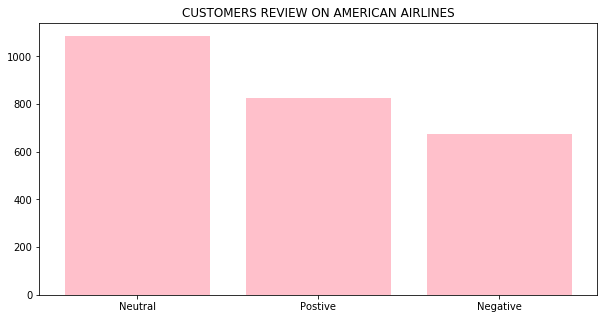

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_AA,Positive_AA,Negative_AA]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'pink')
plt.title('CUSTOMERS REVIEW ON AMERICAN AIRLINES')
plt.show()

**ANALYSIS OF DELTA AIRLINES CUSTOMER REVIEWS**

In [0]:
Delta_AL = pd.read_csv('Delta_june15_july12.csv')
Delta_AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 4 columns):
Text                4142 non-null object
Tweet created at    4142 non-null object
User Location       3267 non-null object
User name           4142 non-null object
dtypes: object(4)
memory usage: 129.5+ KB


In [0]:
Delta_AL['Text'] = Delta_AL['Text'] .apply(deEmojify)
Delta_AL['Text'] = Delta_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
Delta_AL['Text'] = Delta_AL['Text'].str.replace("[^a-zA-Z#]", " ")
Delta_AL['Text'] = Delta_AL['Text'].str.lower()
Delta_AL.head()

,Text,Tweet created at,User Location,User name
0,wendy barrie mauricebenard generalhospit...,2019-06-25 18:31:28,"Clinton Township, MI",Dawn Hogan
1,thumbs up to jim burgen after years as a r...,2019-06-25 18:17:03,"Grand Rapids, MI",FlyGRFord
2,this clerical job might be a great fit for yo...,2019-06-25 18:16:48,Vancouver,TMJ-VAN Cleric. Jobs
3,hope you re enjoying your time in da club n ...,2019-06-25 18:13:00,WWW + Worldwide,The Newbies
4,if i wanted to get screwed i d just pay intere...,2019-06-25 18:09:18,NaN,Joe_Geeter


In [0]:
stop_words_delta = stopwords.words('english')
delta_stopwords = ['https']
stop_words_delta.extend(delta_stopwords)

def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words_delta]


Delta_AL['Processed_text'] = Delta_AL['Text'].apply(text_process)
Delta_AL['Processed_text'] = Delta_AL['Processed_text'].apply(detoken)

In [0]:
text = Delta_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

    
Delta_AL['Sentiment'] = polarity
Delta_AL['Subjectivity'] = subjectivity
Delta_AL['Sentiment'] = Delta_AL['Sentiment'].apply(apply_threshold)
Delta_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,wendy barrie mauricebenard generalhospit...,2019-06-25 18:31:28,"Clinton Township, MI",Dawn Hogan,wendy barrie mauricebenard generalhospital pro...,Neutral,0.000
1,thumbs up to jim burgen after years as a r...,2019-06-25 18:17:03,"Grand Rapids, MI",FlyGRFord,thumbs jim burgen years ramp agent delta grr j...,Negative,0.800
2,this clerical job might be a great fit for yo...,2019-06-25 18:16:48,Vancouver,TMJ-VAN Cleric. Jobs,clerical job might great fit click link bio se...,Positive,0.575
3,hope you re enjoying your time in da club n ...,2019-06-25 18:13:00,WWW + Worldwide,The Newbies,hope enjoying time da club n sango airplane de...,Positive,0.600
4,if i wanted to get screwed i d just pay intere...,2019-06-25 18:09:18,NaN,Joe_Geeter,wanted get screwed pay interest askbarclaysus ...,Neutral,0.000


In [0]:
Neutral_DA = len(Delta_AL['Sentiment'][Delta_AL['Sentiment']=='Neutral'])
Positive_DA = len(Delta_AL['Sentiment'][Delta_AL['Sentiment']=='Positive'])
Negative_DA = len(Delta_AL['Sentiment'][Delta_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_DA)
print("Number of Positive sentiments:",Positive_DA)
print("Number of Negative sentiments:",Negative_DA)

Number of Neutral sentiments: 1635
Number of Positive sentiments: 1865
Number of Negative sentiments: 642


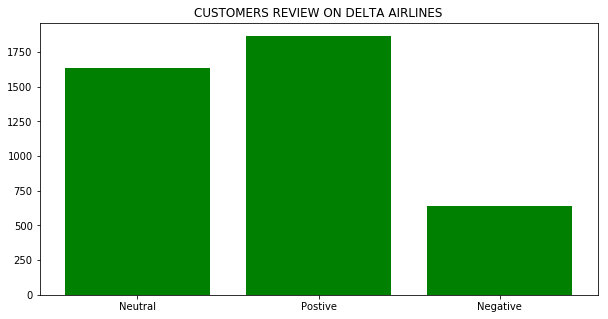

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_DA,Positive_DA,Negative_DA]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'green')
plt.title('CUSTOMERS REVIEW ON DELTA AIRLINES')
plt.show()

**ANALYSIS OF HAWAIIAN AIRLINES CUSTOMER REVIEWS**

In [0]:
Hawaiian_AL = pd.read_csv('Hawaiian_june15_july12.csv')
Hawaiian_AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
Text                67 non-null object
Tweet created at    67 non-null object
User Location       61 non-null object
User name           67 non-null object
dtypes: object(4)
memory usage: 2.2+ KB


In [0]:
Hawaiian_AL['Text'] = Hawaiian_AL['Text'].apply(deEmojify)
Hawaiian_AL['Text'] = Hawaiian_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
Hawaiian_AL['Text'] = Hawaiian_AL['Text'].str.replace("[^a-zA-Z#]", " ")
Hawaiian_AL['Text'] = Hawaiian_AL['Text'].str.lower()
Hawaiian_AL.head()

,Text,Tweet created at,User Location,User name
0,wave wall panels hawaiian airlines size ...,2019-07-02 16:16:09,"Las Vegas, NV",Legacy LV
1,lt after every turn there is something new a...,2019-07-01 05:05:01,"Lahaina, HI",LetsGoToMaui
2,up early to participate in the honolulu aids...,2019-06-30 20:17:00,Hawai‘i,Dr. Kehaulani Watson
3,celebrate national mai tai day with an on the ...,2019-06-30 17:49:10,"Orange County, CA",OC Food Diva
4,new video uploaded hawaiian airlines business...,2019-06-28 12:06:16,Worldwide,Jayda Long


In [0]:
stop_words_hawaiian = stopwords.words('english')
hawaiian_stopwords = ['https','hawaiian','airlines']
stop_words_hawaiian.extend(hawaiian_stopwords)

def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words_hawaiian]


Hawaiian_AL['Processed_text'] = Hawaiian_AL['Text'].apply(text_process)
Hawaiian_AL['Processed_text'] = Hawaiian_AL['Processed_text'].apply(detoken)

In [0]:
text = Hawaiian_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

    
Hawaiian_AL['Sentiment'] = polarity
Hawaiian_AL['Subjectivity'] = subjectivity
Hawaiian_AL['Sentiment'] = Hawaiian_AL['Sentiment'].apply(apply_threshold)
Hawaiian_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,wave wall panels hawaiian airlines size ...,2019-07-02 16:16:09,"Las Vegas, NV",Legacy LV,wave wall panels size x x repeating pattern ha...,Neutral,0.000000
1,lt after every turn there is something new a...,2019-07-01 05:05:01,"Lahaina, HI",LetsGoToMaui,lt every turn something new beautiful see gt c...,Positive,0.727273
2,up early to participate in the honolulu aids...,2019-06-30 20:17:00,Hawai‘i,Dr. Kehaulani Watson,early participate honolulu aidswalk teamkahele...,Positive,0.300000
3,celebrate national mai tai day with an on the ...,2019-06-30 17:49:10,"Orange County, CA",OC Food Diva,celebrate national mai tai day rocks mai tai a...,Neutral,0.000000
4,new video uploaded hawaiian airlines business...,2019-06-28 12:06:16,Worldwide,Jayda Long,new video uploaded business class check youtub...,Positive,0.454545


In [0]:
Neutral_HA = len(Hawaiian_AL['Sentiment'][Hawaiian_AL['Sentiment']=='Neutral'])
Positive_HA = len(Hawaiian_AL['Sentiment'][Hawaiian_AL['Sentiment']=='Positive'])
Negative_HA = len(Hawaiian_AL['Sentiment'][Hawaiian_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_HA)
print("Number of Positive sentiments:",Positive_HA)
print("Number of Negative sentiments:",Negative_HA)

Number of Neutral sentiments: 31
Number of Positive sentiments: 25
Number of Negative sentiments: 11


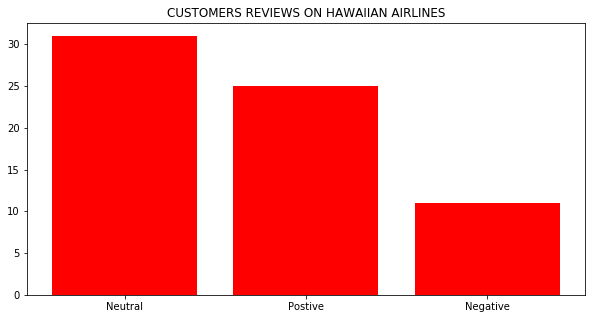

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_HA,Positive_HA,Negative_HA]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'red')
plt.title('CUSTOMERS REVIEWS ON HAWAIIAN AIRLINES')
plt.show()

**ANALYSIS OF JET BLUE AIRLINES CUSTOMER REVIEWS**

In [0]:
Jetblue_AL = pd.read_csv('Jetblue_june15_july12.csv')
Jetblue_AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 4 columns):
Text                777 non-null object
Tweet created at    777 non-null object
User Location       558 non-null object
User name           777 non-null object
dtypes: object(4)
memory usage: 24.4+ KB


In [0]:
Jetblue_AL['Text'] = Jetblue_AL['Text'].apply(deEmojify)
Jetblue_AL['Text'] = Jetblue_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
Jetblue_AL['Text'] = Jetblue_AL['Text'].str.replace("[^a-zA-Z#]", " ")
Jetblue_AL['Text'] = Jetblue_AL['Text'].str.lower()
Jetblue_AL.head()

,Text,Tweet created at,User Location,User name
0,huge thanks to jetblue for getting this famil...,2019-06-25 18:26:31,nationwide,Adoptions With Love
1,i m going to use my askbarclaysus jetblue ca...,2019-06-25 18:15:19,NaN,Joe_Geeter
2,if i wanted to get screwed i d just pay intere...,2019-06-25 18:09:18,NaN,Joe_Geeter
3,if your thinking about the jetblue credit car...,2019-06-25 18:07:13,NaN,Joe_Geeter
4,some of the best flight and customer service e...,2019-06-25 18:05:50,NaN,M.


In [0]:
stop_words_jetblue = stopwords.words('english')
jetblue_stopwords = ['https','jetblue']
stop_words_jetblue.extend(jetblue_stopwords)

def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words_jetblue]


Jetblue_AL['Processed_text'] = Jetblue_AL['Text'].apply(text_process)
Jetblue_AL['Processed_text'] = Jetblue_AL['Processed_text'].apply(detoken)

In [0]:
text = Jetblue_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

    
Jetblue_AL['Sentiment'] = polarity
Jetblue_AL['Subjectivity'] = subjectivity
Jetblue_AL['Sentiment'] = Jetblue_AL['Sentiment'].apply(apply_threshold)
Jetblue_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,huge thanks to jetblue for getting this famil...,2019-06-25 18:26:31,nationwide,Adoptions With Love,huge thanks getting family safely home congrat...,Positive,0.513636
1,i m going to use my askbarclaysus jetblue ca...,2019-06-25 18:15:19,NaN,Joe_Geeter,going use askbarclaysus card promote tweet,Neutral,0.000000
2,if i wanted to get screwed i d just pay intere...,2019-06-25 18:09:18,NaN,Joe_Geeter,wanted get screwed pay interest askbarclaysus ...,Neutral,0.000000
3,if your thinking about the jetblue credit car...,2019-06-25 18:07:13,NaN,Joe_Geeter,thinking credit card askbarclaysus dont advert...,Positive,0.500000
4,some of the best flight and customer service e...,2019-06-25 18:05:50,NaN,M.,best flight customer service experiences alway...,Positive,0.600000


In [0]:
Neutral_JB = len(Jetblue_AL['Sentiment'][Jetblue_AL['Sentiment']=='Neutral'])
Positive_JB = len(Jetblue_AL['Sentiment'][Jetblue_AL['Sentiment']=='Positive'])
Negative_JB = len(Jetblue_AL['Sentiment'][Jetblue_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_JB)
print("Number of Positive sentiments:",Positive_JB)
print("Number of Negative sentiments:",Negative_JB)

Number of Neutral sentiments: 336
Number of Positive sentiments: 300
Number of Negative sentiments: 141


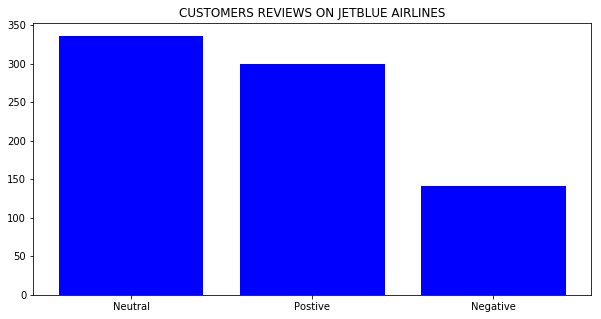

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_JB,Positive_JB,Negative_JB]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'blue')
plt.title('CUSTOMERS REVIEWS ON JETBLUE AIRLINES')
plt.show()

**ANALYSIS OF SOUTHWEST AIRLINES CUSTOMER REVIEWS**

In [0]:
Southwest_AL = pd.read_csv('Southwest_june15_july12.csv')
Southwest_AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 4 columns):
Text                5876 non-null object
Tweet created at    5876 non-null object
User Location       4345 non-null object
User name           5876 non-null object
dtypes: object(4)
memory usage: 183.7+ KB


In [0]:
Southwest_AL['Text'] = Southwest_AL['Text'].apply(deEmojify)
Southwest_AL['Text'] = Southwest_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
Southwest_AL['Text'] = Southwest_AL['Text'].str.replace("[^a-zA-Z#]", " ")
Southwest_AL['Text'] = Southwest_AL['Text'].str.lower()
Southwest_AL.head()

,Text,Tweet created at,User Location,User name
0,are you a manufacturer in the southwest don...,2019-07-12 08:19:10,"Salisbury, England",Ruth Lambert
1,fantastic list of ideas for a south west usa r...,2019-07-12 08:18:43,On the Road,World Heritage Journey ✈
2,fancy a change this weekend our weekend treat...,2019-07-12 08:15:16,Exeter,J&R Food Service Ltd
3,thanks to lossky for following we are charte...,2019-07-12 07:58:05,"Exeter, Devon, United Kingdom",Revell Research
4,bitcoin btc payment app fold implements ligh...,2019-07-12 07:45:02,NaN,🔗bitsmart.io


In [0]:
stop_words_sw = stopwords.words('english')
sw_stopwords = ['https','southwestairlines','southwestair']
stop_words_sw.extend(sw_stopwords)

def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words_sw]


Southwest_AL['Processed_text'] = Southwest_AL['Text'].apply(text_process)
Southwest_AL['Processed_text'] = Southwest_AL['Processed_text'].apply(detoken)

In [0]:
text = Southwest_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

    
Southwest_AL['Sentiment'] = polarity
Southwest_AL['Subjectivity'] = subjectivity
Southwest_AL['Sentiment'] = Southwest_AL['Sentiment'].apply(apply_threshold)
Southwest_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,are you a manufacturer in the southwest don...,2019-07-12 08:19:10,"Salisbury, England",Ruth Lambert,manufacturer southwest miss opportunity feed l...,Positive,0.90
1,fantastic list of ideas for a south west usa r...,2019-07-12 08:18:43,On the Road,World Heritage Journey ✈,fantastic list ideas south west usa road trip ...,Positive,0.90
2,fancy a change this weekend our weekend treat...,2019-07-12 08:15:16,Exeter,J&R Food Service Ltd,fancy change weekend weekend treats help accom...,Neutral,0.00
3,thanks to lossky for following we are charte...,2019-07-12 07:58:05,"Exeter, Devon, United Kingdom",Revell Research,thanks lossky following chartered professional...,Positive,0.15
4,bitcoin btc payment app fold implements ligh...,2019-07-12 07:45:02,NaN,🔗bitsmart.io,bitcoin btc payment app fold implements lightn...,Neutral,0.00


In [0]:
Neutral_SW = len(Southwest_AL['Sentiment'][Southwest_AL['Sentiment']=='Neutral'])
Positive_SW = len(Southwest_AL['Sentiment'][Southwest_AL['Sentiment']=='Positive'])
Negative_SW = len(Southwest_AL['Sentiment'][Southwest_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_SW)
print("Number of Positive sentiments:",Positive_SW)
print("Number of Negative sentiments:",Negative_SW)

Number of Neutral sentiments: 3551
Number of Positive sentiments: 1876
Number of Negative sentiments: 449


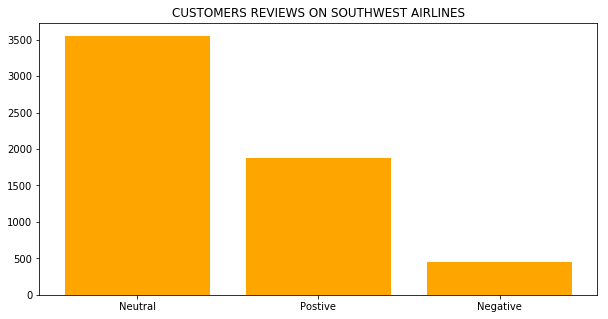

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_SW,Positive_SW,Negative_SW]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'orange')
plt.title('CUSTOMERS REVIEWS ON SOUTHWEST AIRLINES')
plt.show()

**ANALYSIS OF UNITED AIRLINES CUSTOMER REVIEWS**

In [0]:
United_AL = pd.read_csv('united_june15_july12.csv')
United_AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 4 columns):
Text                1790 non-null object
Tweet created at    1790 non-null object
User Location       1184 non-null object
User name           1790 non-null object
dtypes: object(4)
memory usage: 56.0+ KB


In [0]:
United_AL['Text'] = United_AL['Text'].apply(deEmojify)
United_AL['Text'] = United_AL['Text'].str.replace("[#,@,:,::,.,_,-,?,\,+,(,),',!,//]", " ")
United_AL['Text'] = United_AL['Text'].str.replace("[^a-zA-Z#]", " ")
United_AL['Text'] = United_AL['Text'].str.lower()
United_AL.head()

,Text,Tweet created at,User Location,User name
0,on the nd leg to italy unitedairlines partn...,2019-07-12 05:55:35,"Denver, CO",Fur_Food_Travel
1,landed minutes early now waiting more than ...,2019-07-12 05:22:39,NaN,Jill Irwin
2,never take americanairlines lost baggage no ...,2019-07-12 05:07:43,NaN,Megan Lynn
3,stuck in chicago on the way to hawaii no lugg...,2019-07-12 04:24:14,NaN,Angelo Buccat
4,united i need help never flying united agai...,2019-07-12 04:24:13,"Suburbia, NY",SingleBrownGirl


In [0]:
stop_words_united = stopwords.words('english')
united_stopwords = ['https',' unitedairlines','unitedairlines']
stop_words_united.extend(united_stopwords)

def text_process(raw_text):
    ps = PorterStemmer()
    nonpunc = ps.stem(raw_text)
    return [word for word in nonpunc.split() if word not in stop_words_united]


United_AL['Processed_text'] = United_AL['Text'].apply(text_process)
United_AL['Processed_text'] = United_AL['Processed_text'].apply(detoken)

In [0]:
text = United_AL['Processed_text']
polarity=[]
subjectivity=[]
for i in text:
    blob = TextBlob(i)
    sentiment = blob.sentiment
    po = sentiment.polarity
    polarity.append(po)
    sub = sentiment.subjectivity
    subjectivity.append(sub)

    
United_AL['Sentiment'] = polarity
United_AL['Subjectivity'] = subjectivity
United_AL['Sentiment'] = United_AL['Sentiment'].apply(apply_threshold)
United_AL.head()

,Text,Tweet created at,User Location,User name,Processed_text,Sentiment,Subjectivity
0,on the nd leg to italy unitedairlines partn...,2019-07-12 05:55:35,"Denver, CO",Fur_Food_Travel,nd leg italy partnered marvel amp spiderman th...,Neutral,0.0
1,landed minutes early now waiting more than ...,2019-07-12 05:22:39,NaN,Jill Irwin,landed minutes early waiting minutes find crew...,Positive,0.3
2,never take americanairlines lost baggage no ...,2019-07-12 05:07:43,NaN,Megan Lynn,never take americanairlines lost baggage one c...,Neutral,0.0
3,stuck in chicago on the way to hawaii no lugg...,2019-07-12 04:24:14,NaN,Angelo Buccat,stuck chicago way hawaii luggage toiletries un...,Negative,1.0
4,united i need help never flying united agai...,2019-07-12 04:24:13,"Suburbia, NY",SingleBrownGirl,united need help never flying united neveragai...,Neutral,0.0


In [0]:
Neutral_UA = len(United_AL['Sentiment'][United_AL['Sentiment']=='Neutral'])
Positive_UA = len(United_AL['Sentiment'][United_AL['Sentiment']=='Positive'])
Negative_UA = len(United_AL['Sentiment'][United_AL['Sentiment']=='Negative'])
print("Number of Neutral sentiments:",Neutral_UA)
print("Number of Positive sentiments:",Positive_UA)
print("Number of Negative sentiments:",Negative_UA)

Number of Neutral sentiments: 730
Number of Positive sentiments: 624
Number of Negative sentiments: 436


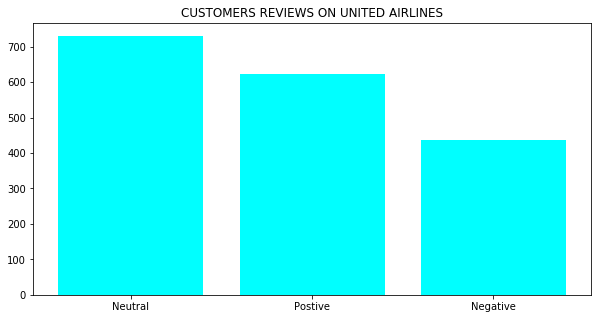

In [0]:
x= ['Neutral','Postive','Negative']
y = [Neutral_UA,Positive_UA,Negative_UA]
plt.figure(figsize=(10,5))
plt.bar(x,y,color = 'cyan')
plt.title('CUSTOMERS REVIEWS ON UNITED AIRLINES')
plt.show()

**NEUTRAL SENTIMENT PLOT**

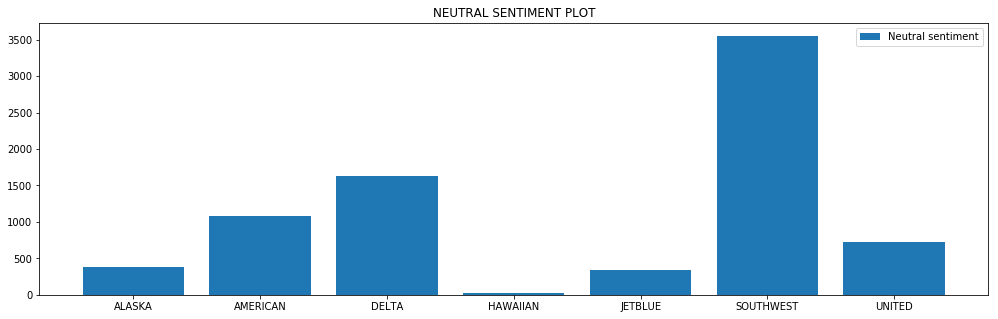

In [0]:
X=['ALASKA','AMERICAN','DELTA','HAWAIIAN','JETBLUE','SOUTHWEST','UNITED']
Y1=[Neutral_AL,Neutral_AA,Neutral_DA,Neutral_HA,Neutral_JB,Neutral_SW,Neutral_UA]
plt.figure(figsize=(17,5))
plt.bar(X,Y1,label='Neutral sentiment')
plt.title('NEUTRAL SENTIMENT PLOT')
plt.legend()
plt.show()

**POSITIVE SENTIMENT PLOT**

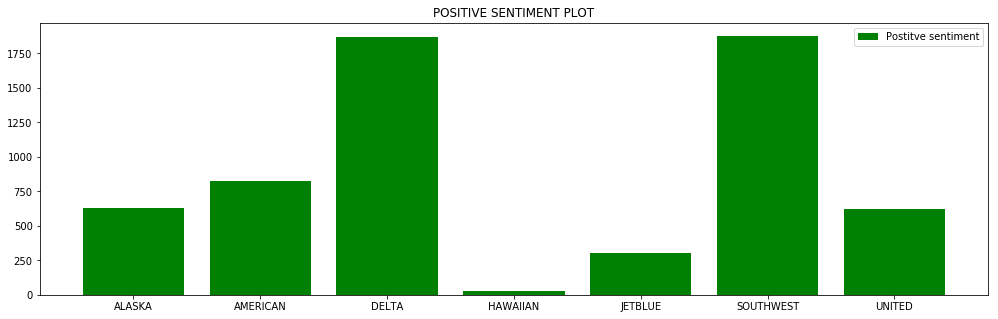

In [0]:
X=['ALASKA','AMERICAN','DELTA','HAWAIIAN','JETBLUE','SOUTHWEST','UNITED']
Y1=[Positive_AL,Positive_AA,Positive_DA,Positive_HA,Positive_JB,Positive_SW,Positive_UA]
plt.figure(figsize=(17,5))
plt.bar(X,Y1,label = 'Postitve sentiment',color='g')
plt.title('POSITIVE SENTIMENT PLOT')
plt.legend()
plt.show()

**NEGATIVE SENTIMENT PLOT**

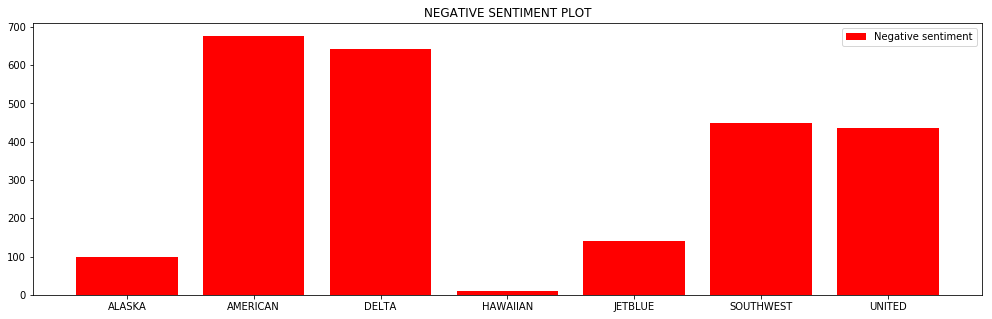

In [0]:
X=['ALASKA','AMERICAN','DELTA','HAWAIIAN','JETBLUE','SOUTHWEST','UNITED']
Y3=[Negative_AL,Negative_AA,Negative_DA,Negative_HA,Negative_JB,Negative_SW,Negative_UA]
plt.figure(figsize=(17,5))
plt.title('NEGATIVE SENTIMENT PLOT')
plt.bar(X,Y3,label='Negative sentiment',color='red')
plt.legend()
plt.show()

**COMPARING THE REVIEWS OF  DIFFERENT AIRLINES**

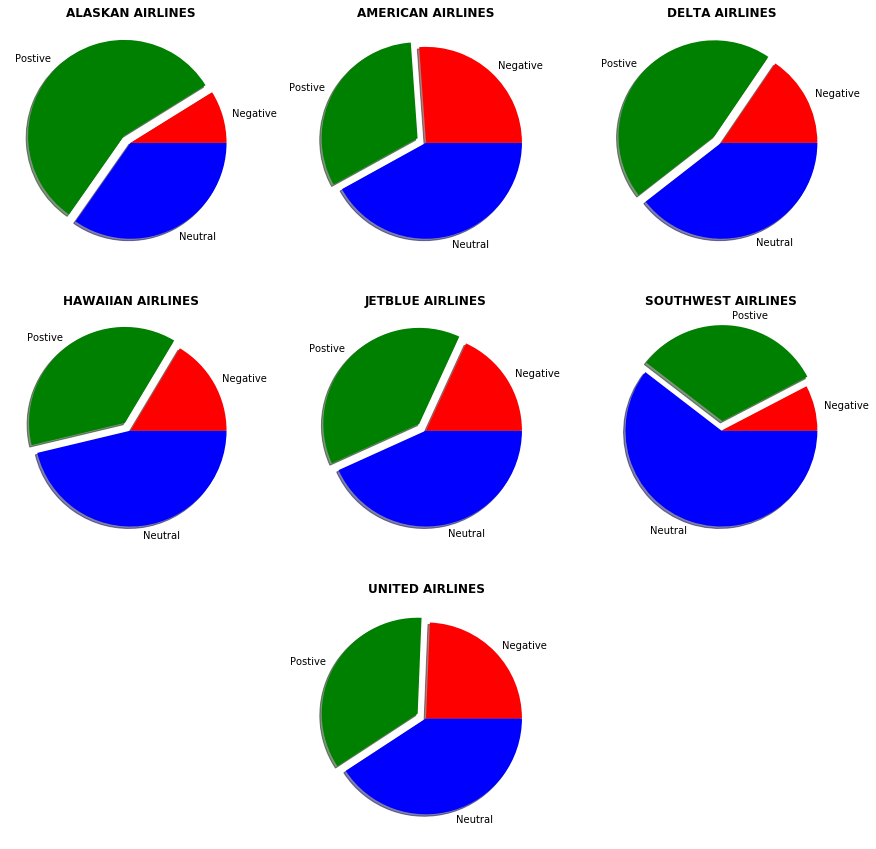

In [190]:
from pylab import *
plt.figure(figsize=(15,15))

subplot(3,3,1)
a_val = [Neutral_AL,Positive_AL,Negative_AL]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('ALASKAN AIRLINES',weight='bold')


subplot(3,3,2)
a1_val = [Neutral_AA,Positive_AA,Negative_AA]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a1_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('AMERICAN AIRLINES',weight='bold')


subplot(3,3,3)
a2_val = [Neutral_DA,Positive_DA,Negative_DA]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a2_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('DELTA AIRLINES',weight='bold')



subplot(3,3,4)
a3_val = [Neutral_HA,Positive_HA,Negative_HA]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a3_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('HAWAIIAN AIRLINES',weight='bold')


subplot(3,3,5)
a4_val = [Neutral_JB,Positive_JB,Negative_JB]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a4_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('JETBLUE AIRLINES',weight='bold')


subplot(3,3,6)
a5_val = [Neutral_SW,Positive_SW,Negative_SW]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a5_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('SOUTHWEST AIRLINES',weight='bold')


subplot(3,3,8)
a6_val = [Neutral_UA,Positive_UA,Negative_UA]
colors = ['b', 'g', 'r']
a_label= ['Neutral','Postive','Negative']
explode = (0,0.1,0)
plt.pie(a6_val, colors=colors, labels=a_label ,explode=explode,counterclock=False, shadow=True)
plt.title('UNITED AIRLINES',weight='bold')
plt.show()

**CONCLUSION**


Passangers satisfaction is an important aspect for all the airlines and the lack of reliability will affect the customers trust in the company,creates a bad image and also affects the companies profits. Meeting the customer's conditions is essential for customer loyalty and companies should take measures to satisfy the customer needs. 

Positive reviews(sentiments) in descending order:
1.  Alaska Airlines - 56.4%
2.  Delta Airlines - 45.5%
3. JetBlue Airlines - 38.6%
4. Hawaiian Airlines - 37.3%
5. United Airlines - 34.8%
6. Southwest Airlines - 31.9%
7. American Airlines - 31.7%


Negative reviews(sentiments) in descending order:
1. American Airlines - 26.6%
2. United Airlines - 24.5%
3. JetBlue Airlines - 18.2%
4.  American Airlines - 16.5%
5.  Delta Airlines - 15.1%
6.  Alaska Airlines - 8.9%
7.  Southwest Airlines - 7.7%


The findings show that Alaska airlines is ranked no.1 in terms of customers reviews followed by Delta and others. While, American airlines has the worst customer reviews and United airlines has the second poor reviews followed by others. This research finding will give an insight to the different airlines to recall their operating procedures and services to make necessary changes in order to  meet the customer satisfactions and inturn increasing companies profits.